In [ ]:
!pip install mplfinance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from prophet import Prophet

In [ ]:
dados = yf.download('PETR4.SA', start = '2023-01-01', end = '2023-12-31')
print(dados)

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2023-01-02  23.540001  23.809999  22.799999  22.920000  17.709478   78424700
2023-01-03  22.940001  23.100000  22.129999  22.340000  17.261332   96750300
2023-01-04  21.959999  23.590000  21.830000  23.049999  17.809923  129504000
2023-01-05  23.340000  24.040001  23.150000  23.879999  18.451237   73886000
2023-01-06  23.940001  24.320000  23.549999  23.740000  18.343061   51851500
...               ...        ...        ...        ...        ...        ...
2023-12-21  36.669998  36.680000  36.070000  36.389999  36.389999   30511900
2023-12-22  36.500000  36.799999  36.369999  36.740002  36.740002   31234700
2023-12-26  36.860001  37.369999  36.830002  37.330002  37.330002   23466800
2023-12-27  37.320000  37.430000  37.130001  37.360001  37.360001   19588500
2023-12-28  37.230000  37.360001  37.040001  37.240002  37.240002   21421900

In [ ]:
dados.columns = ['Aber', 'Max', 'Min', 'Fech', 'Fech_Ajust', 'Volume']
dados = dados.rename_axis('Data')
dados


,Aber,Max,Min,Fech,Fech_Ajust,Volume
Data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451237,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


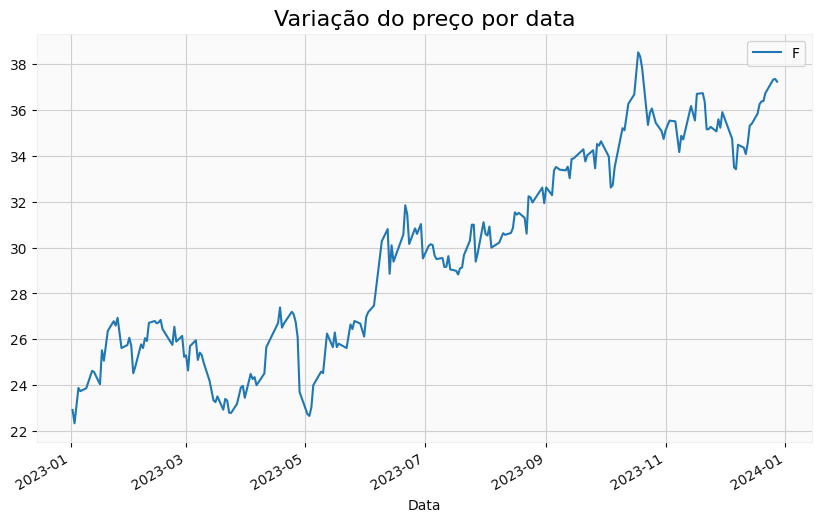

In [ ]:
dados['Fech'].plot(figsize = (10,6))
plt.title('Variação do preço por data', fontsize = 16)
plt.legend('Fech')

In [ ]:
df = dados.head(60).copy()

#convertendo o indice em uma coluna de data
df['Data'] = df.index

#Convertendo as datas para formato numerico de matplotlib
#Isso é necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
df['Data'] = df['Data'].apply(mdates.date2num)

df


,Aber,Max,Min,Fech,Fech_Ajust,Volume,Data
Data,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451237,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500,19363.0
2023-01-09,23.500000,24.000000,23.250000,23.870001,18.443510,46385200,19366.0
2023-01-10,23.950001,24.110001,23.370001,24.090000,18.613495,52741100,19367.0
2023-01-11,24.150000,24.620001,24.049999,24.280001,18.760302,53536500,19368.0
2023-01-12,24.290001,24.650000,24.110001,24.629999,19.030735,58130000,19369.0


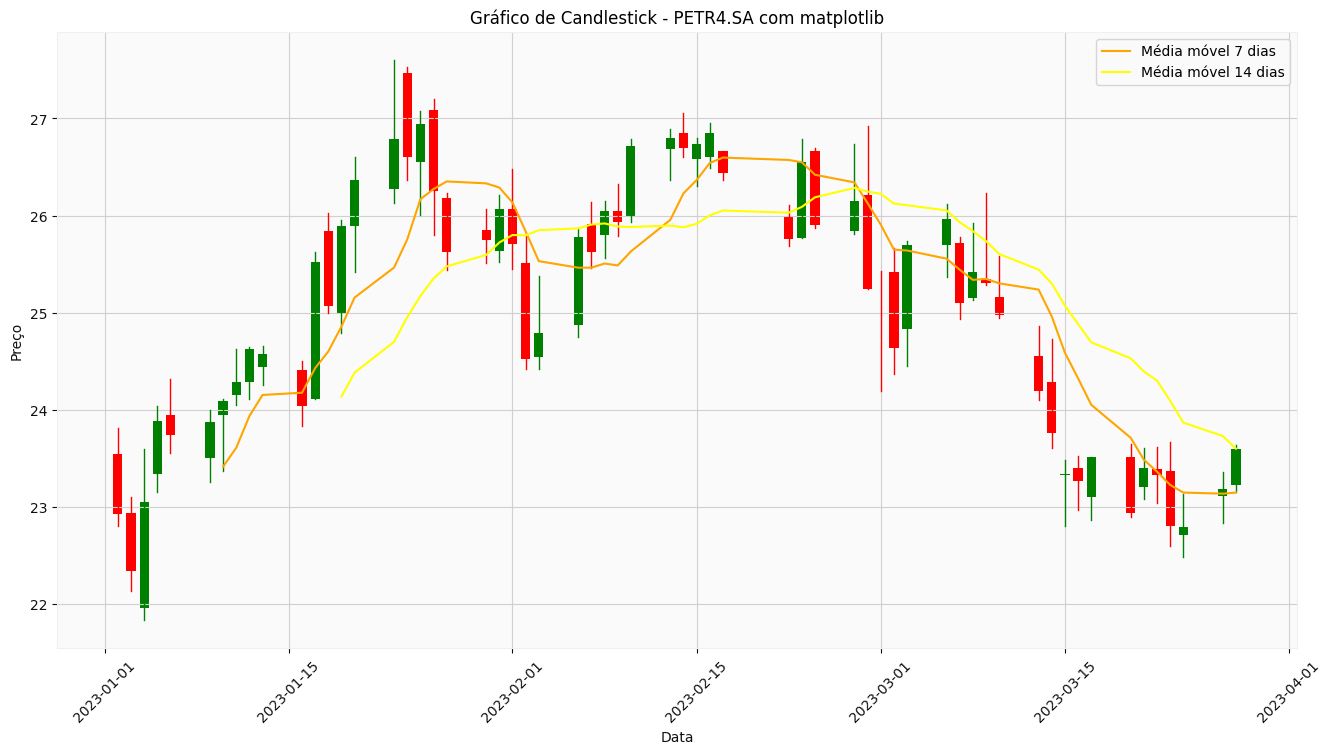

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))

#Vamos definir a largura dos candles
width = 0.7

for i in range(len(df)):
  #determinando a cor do candle
  #SE o preço de fechamento for maior que o  de abertura, o candle é verde (a ação valorizou)
  #SE o preço de fechamento for menor que o de abertura, o candle é vermelho (a ação desvalorizou)

    if df['Fech'].iloc[i] > df['Aber'].iloc[i]:
      color = 'green'
    else:
      color = 'red'

    #desenhando a linha vertical do candle(mecha)
    #essa linha mostra os preços máximo(topo da linha) e mínimo (base da linha) do dia.
    #Usamos ax.plot para desenhar uma linha vertical.
    # [df['Data'].iloc[i], df['Data'].iloc[i]] define o ponto x da linha(a data), e [df['Minimo].iloc[i], df['Maximo'].iloc[i]]
    ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
            [df['Min'].iloc[i], df['Max'].iloc[i]],
            color = color,
            linewidth = 1)

    ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Aber'].iloc[i], df['Fech'].iloc[i])),
                               width,
                               abs(df['Fech'].iloc[i] - df['Aber'].iloc[i]),
                               facecolor=color))

df['MA7'] = df['Fech'].rolling(window=7).mean()
df['MA14'] = df['Fech'].rolling(window=14).mean()

#plotando as medias moveis
ax.plot(df['Data'], df['MA7'], color = 'orange', label= 'Média móvel 7 dias')
ax.plot(df['Data'], df['MA14'], color = 'yellow', label= 'Média móvel 14 dias')

#Adicionando legendas para as méidas móveis
ax.legend()

#formatando o eixo x para mostrar as datas

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

#adicionando rotulos e titulos para os eixos

plt.title('Gráfico de Candlestick - PETR4.SA com matplotlib')
plt.xlabel('Data')
plt.ylabel('Preço')


#Adicionando rgade para visualizar mais facilmente os valores
plt.grid(True)

plt.show()

In [ ]:
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Aber'],
                             high=df['Max'],
                             low=df['Min'],
                             close=df['Fech'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()

In [ ]:
dados = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


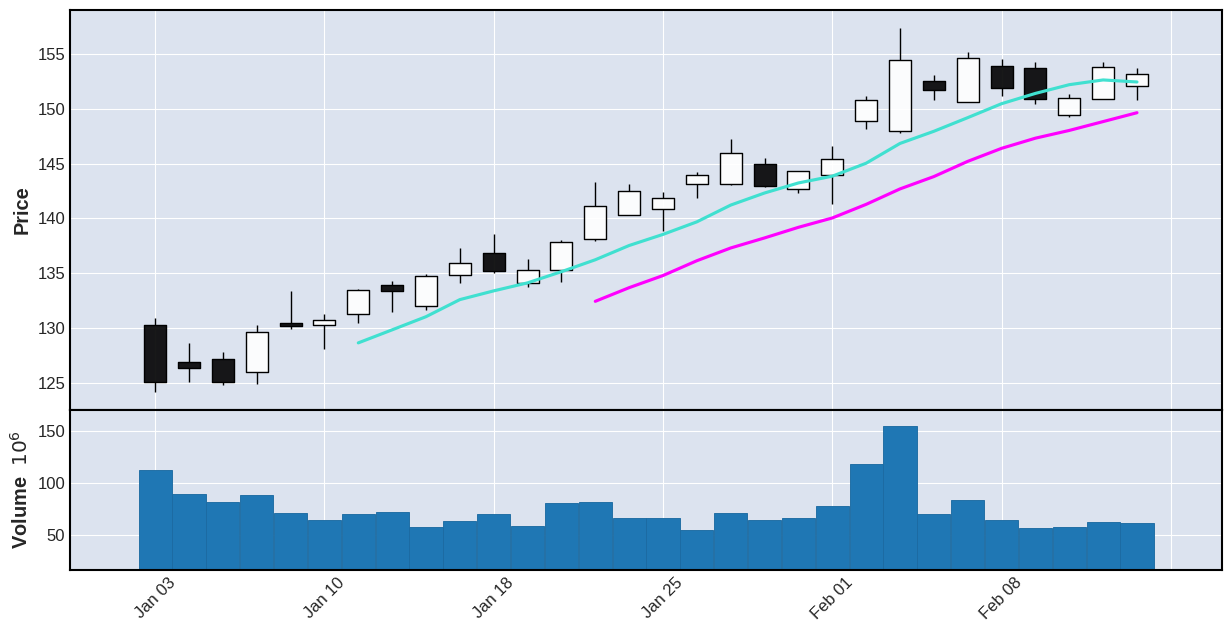

In [ ]:
mpf.plot(dados.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14))

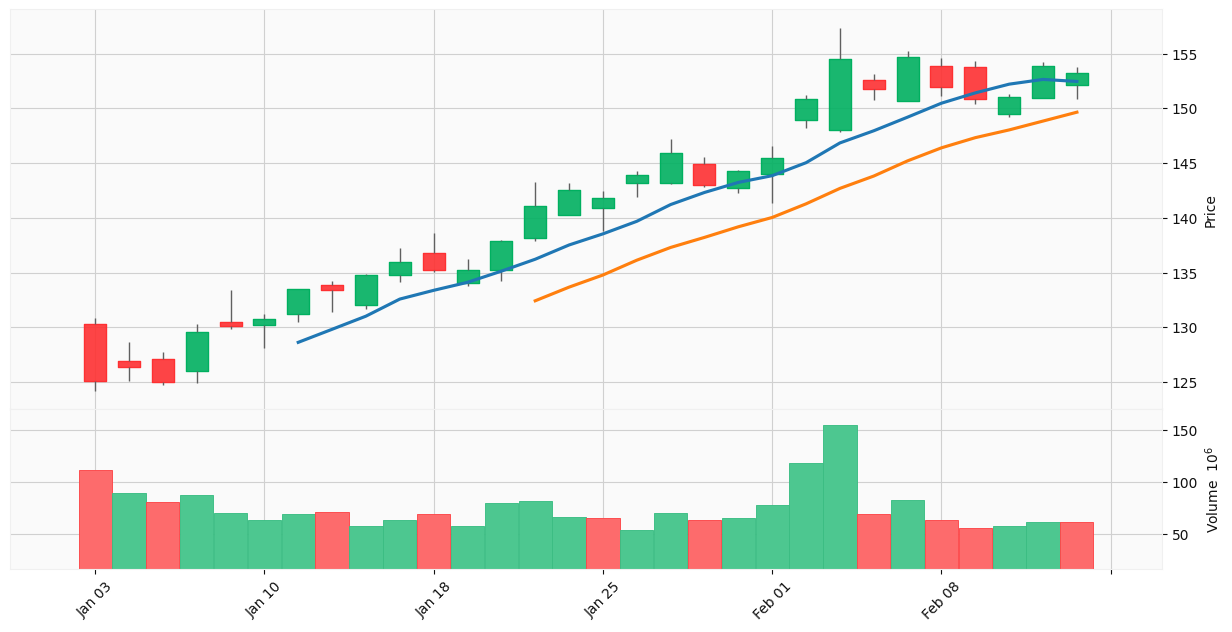

In [ ]:
mpf.plot(dados.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14), style = 'yahoo')

In [ ]:
dados = yf.download("JNJ", start = '2020-01-01', end= '2023-12-31', progress =  False)
dados= dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099121,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592834,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432419,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216766,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198959,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [ ]:
#separar os dados para treinar e testar as previsões
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [ ]:
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns= {'Date': 'ds', 'Close': 'y'}) # para que o modelo prophet funcione as colunas devem estar caracterizadas como 'ds' e 'y'

In [ ]:
#criando e treinando o modelo

modelo = Prophet(weekly_seasonality=  True,
                 yearly_seasonality= True,
                 daily_seasonality = False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0r88j7p9/7xt1ho2r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0r88j7p9/vozleukc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10126', 'data', 'file=/tmp/tmp0r88j7p9/7xt1ho2r.json', 'init=/tmp/tmp0r88j7p9/vozleukc.json', 'output', 'file=/tmp/tmp0r88j7p9/prophet_modelawsugeyv/prophet_model-20240401040028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:00:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:00:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

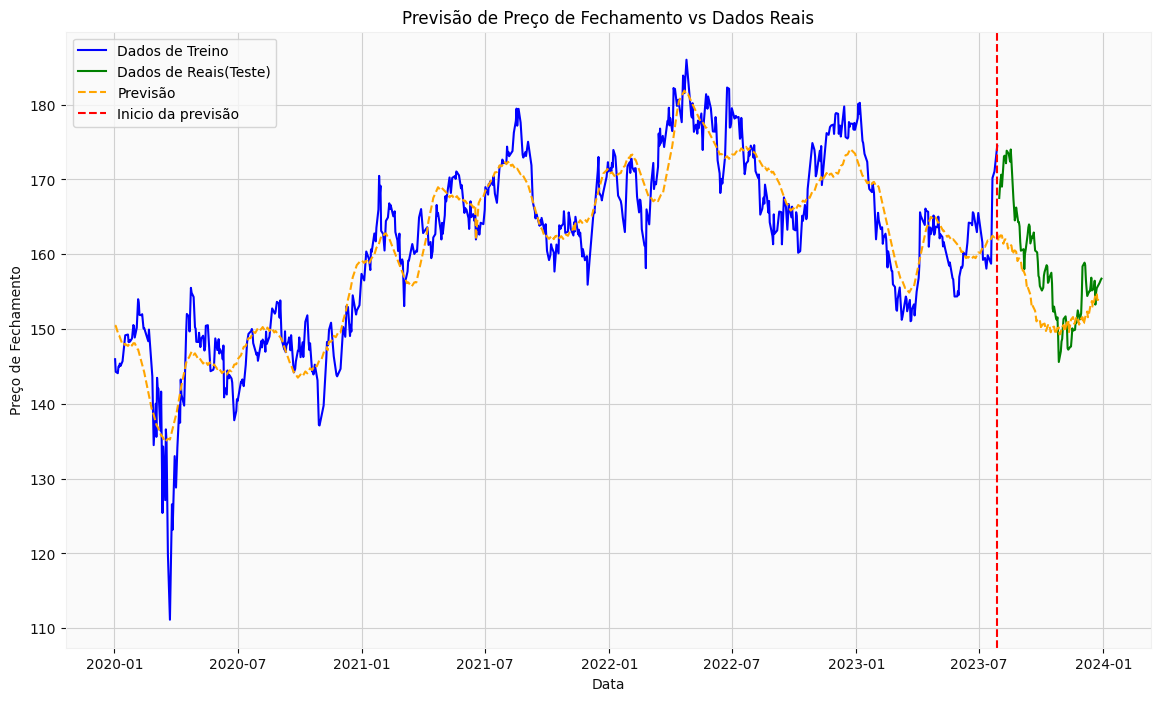

In [ ]:
#plotar os dados de treino teste e previsao

plt.figure(figsize= (14,8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label = 'Dados de Treino', color= 'blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label = 'Dados de Reais(Teste)', color= 'green')
plt.plot(previsao['ds'], previsao['yhat'], label = 'Previsão', color= 'orange', linestyle= '--')

plt.axvline(dados_treino['Date'].max(), color = 'red', linestyle= '--', label= 'Inicio da previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()

